In [1]:
# Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Show sample of crypto_data dataframe

crypto_data = pd.read_csv('crypto_data.csv')
crypto_data.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Select trading cryptos only

trading_data = crypto_data[crypto_data['IsTrading'] == True]
trading_data.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Clean dataframe

# Drop IsTrading column
trading_data.drop('IsTrading', axis=1, inplace=True)

# Drop NaN values
trading_data.dropna(inplace=True)

# Get only values that have mined coins 
trading_data = trading_data[trading_data['TotalCoinsMined'] > 0]

# Drop CoinName
trading_data.drop('CoinName', axis=1, inplace=True)

# Create dummy data

dummy_df = pd.get_dummies(trading_data)

dummy_df.head()

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-4-f5f5c5aeccb4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_data.dropna(inplace=True)


,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Scale and transform data

scaled_df = StandardScaler().fit_transform(dummy_df)

pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(scaled_df)
len(crypto_pca)

532

In [6]:
crypto_pca_df = pd.DataFrame(data = crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.306478,-0.134248,-2.567847e-15,-1.442737e-14,0.034075,1.765116,-0.400153,0.105507,-2.213661,-0.508047,...,-0.000000e+00,-0.000000e+00,5.917241e-16,2.215320e-19,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
1,-0.286779,-0.135378,7.433740e-16,-1.797819e-14,0.029073,1.763942,-0.400047,0.105766,-2.216127,-0.508439,...,-4.601236e-15,1.302178e-14,8.279457e-16,-1.057281e-16,2.506556e-15,-1.486817e-16,3.566022e-15,2.475690e-15,-2.655374e-15,-7.564581e-17
2,0.361159,-0.003304,-3.210345e-15,-4.534394e-16,-0.094542,2.909136,-0.481620,-0.442389,-1.633107,0.000252,...,-2.314599e-15,-4.859521e-15,-9.131104e-15,-1.002232e-15,2.611704e-15,-5.347171e-15,-1.001093e-15,1.807247e-16,-3.782215e-15,5.188829e-16
3,-0.287881,-0.256431,-7.425722e-15,-3.300552e-14,0.001154,-1.825765,0.183748,-0.142160,0.426857,0.250633,...,-1.822688e+00,2.974025e-01,1.073856e+00,-1.048815e+00,8.321595e-01,2.721860e+00,1.162514e+00,-2.000870e+00,1.125042e+00,-1.392129e+00
4,-0.136884,-0.256819,-8.191243e-15,-3.557103e-14,-0.049065,-1.761258,0.160765,-0.086250,0.497740,0.093311,...,-1.704392e+00,-1.163227e+00,1.154593e+00,-8.650385e-01,-6.539892e-01,-1.586896e+00,1.537657e+00,-1.147037e+00,-1.239488e-01,2.543553e+00


In [7]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca_df)

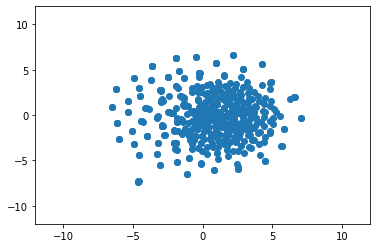

In [9]:
crypto_pca_df['x'] = tsne_features[:,0]
crypto_pca_df['y'] = tsne_features[:,1]
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.xlim(-12,12)
plt.ylim(-12,12)
plt.show()

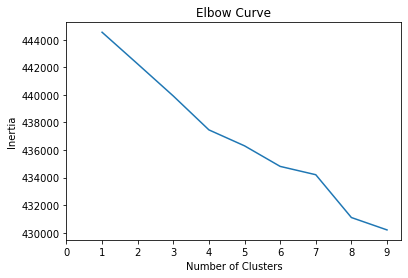

In [13]:
intertia = []
k = list(range(1,10))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    intertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia': intertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(10)))
plt.title('Elbow Curve')
plt.xlabel("Number of Clusters")
plt.ylabel('Inertia')
plt.show()

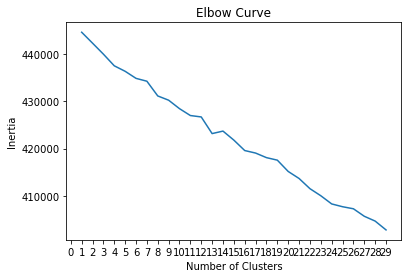

In [14]:
intertia = []
k = list(range(1,30))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    intertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia': intertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(30)))
plt.title('Elbow Curve')
plt.xlabel("Number of Clusters")
plt.ylabel('Inertia')
plt.show()